# PROJETO INTEGRADOR 2022 - ANÁLISE DE DADOS
Dados do CENIPA sobre acidentes Aéreos Ocorridos no Brasil de 2010 a 2019


---




# Bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from collections import Counter
import statistics as static
from sklearn import linear_model


**Pandas**

Pandas é uma biblioteca Python para análise de dados. É constituída pelo matplotlib para visualização de dados e NumPy para operações matemáticas. É uma ferramenta de análise quantitativa poderosa e flexível que permite que você acesse muitos dos métodos do matplotlib e do NumPy com menos código (MODE, 2022).



**Numpy**

Numpy é uma biblioteca de Python usada para trabalhar com arrays. Ela possui também uma função para trabalhar com álgebra linear e matrizes. Numpy é open source e pode ser usada gratuitamente (W3SCHOOLS, 2022).



**Matplotlib**

Usada para visualização de dados e plotagem gráfica, a  matplotlib é uma biblioteca da linguagem Python.
(VOITTO, 2021).










# Importação dos dados

# Nova seção

In [2]:
# FUNÇÃO DADOS NO GRÁFICO QUANDO ESTE FOR EM BARRAS HORIZONTAIS
def dados(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3), 
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

In [6]:
# IMPORTAÇÃO DOS DADOS
ocorrencias = pd.read_csv('/content/ocorrencias_cenipa.csv')

# Nova seção

In [7]:
ocorrencias.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


# Acidentes/Incidentes por Estado

In [8]:
# SELECIONANDO OS ESTADOS DAS OCORRENCIAS
estados = Counter(ocorrencias['estado'])
# 
fase_estados = sorted(estados, key = estados.get, reverse = False)
#
contador = sorted(list(estados.values()), reverse = False)

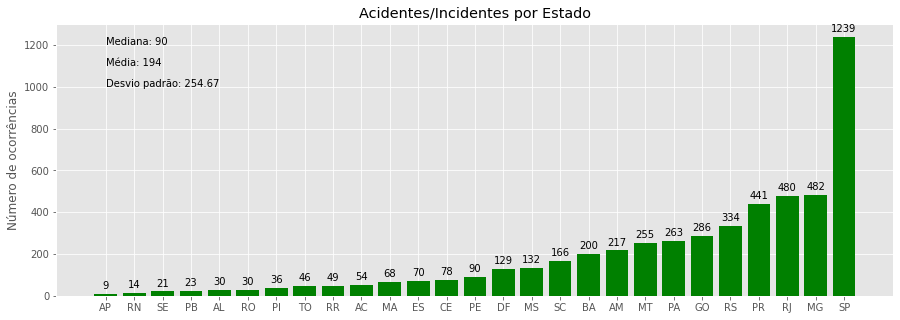

In [9]:
# SELECIONANDO STYLE DO GRÁFICO
plt.style.use('ggplot')

# CONFIGURANDO TAMANHO VISUAL DO GRÁFICO
fig,ax = plt.subplots(figsize = (15, 5))

# ATRIBUINDO VALORES CORRESPONDENTES ÀS VARIÁVEIS 'X' E 'Y'
linha_x = fase_estados
linha_y = contador

# CONFIGURANDO O LAYOUT DO GRÁFICO
rects1 = ax.bar(linha_x, linha_y, color = 'Green')

# NOMECLATURA DO EIXO Y
plt.ylabel("Número de ocorrências")

# TITULO DO GRÁFICO
plt.title('Acidentes/Incidentes por Estado')

# CALCULANDO A MEDIANA
plt.text(0, 1200.9, 'Mediana: %d' % (np.median(np.array(contador))))

# CALCULANDO A MÉDIA
plt.text(0, 1100.9, 'Média: %d' % (np.mean(np.array(contador))))

# CALCULANDO DO DESVIO PADRÃO
plt.text(0, 1000.9, 'Desvio padrão: %.2f' % (static.stdev(contador)))   

# PLOTANDO NÚMERO DE OCORRÊNCIAS EM CADA CIDADE
dados(rects1, ax)

# MOSTRANDO O GRÁFICO
plt.show()

# Estatísticas de Ocorrencias por cidade

In [10]:
cidade = Counter(ocorrencias['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador = sorted(list(cidade.values()), reverse = True)

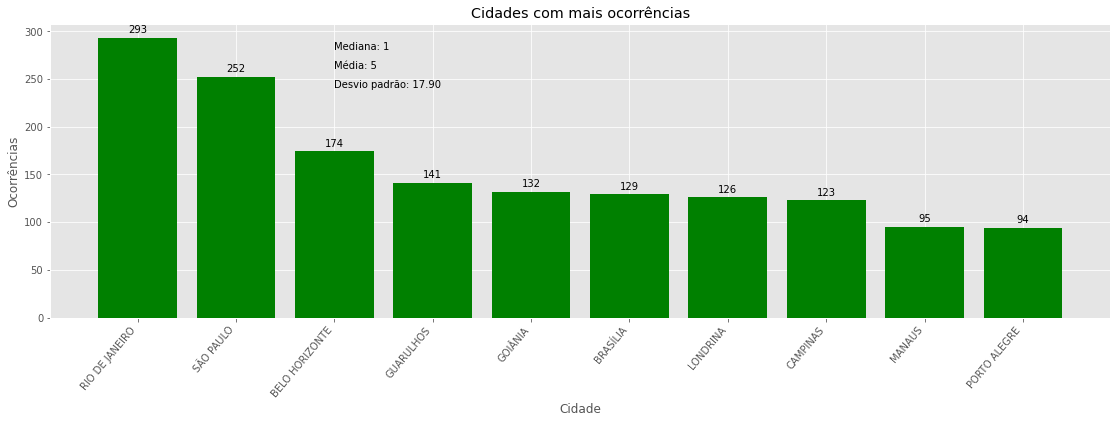

In [11]:
# SELECIONANDO STYLE DO GRÁFICO
plt.style.use('ggplot')

# CONFIGURANDO TAMANHO VISUAL DO GRÁFICO
fig,ax = plt.subplots(figsize = (19, 6))

# ATRIBUINDO VALORES CORRESPONDENTES ÀS VARIÁVEIS 'X' E 'Y'
x = fase_cidade[:10]
y = contador[:10]

# DEFININDO LAYOUT DO GRÁFICO
rects1 = ax.bar(x, y, color = 'Green')

# DEFININDO TÍTULO DO EIXO 'X'
plt.xlabel('Cidade')

# CONFIGURANDO O FORMATO DE VISUALIZAÇÃO DO GRÁFICO
fig.autofmt_xdate(rotation = 50)

# DEFININDO TÍTULO DO EIXO 'Y'
plt.ylabel("Ocorrências")

# DEFININDO TÍTULO DO GRÁFICO
plt.title("Cidades com mais ocorrências")

# PLOTANDO NÚMERO DE OCORRÊNCIAS EM CADA CIDADE
dados(rects1, ax)

# CALCULANDO A MEDIANA
plt.text(2, 280.9, 'Mediana: %d' % (np.median(np.array(contador))))

# CALCULANDO A MÉDIA
plt.text(2, 260.9, 'Média: %d' % (np.mean(np.array(contador))))

# CALCULANDO DO DESVIO PADRÃO
plt.text(2, 240.9, 'Desvio padrão: %.2f' % (static.stdev(contador)))   

# MOSTRANDO O GRÁFICO
plt.show()

# Percentual de Ocorrências

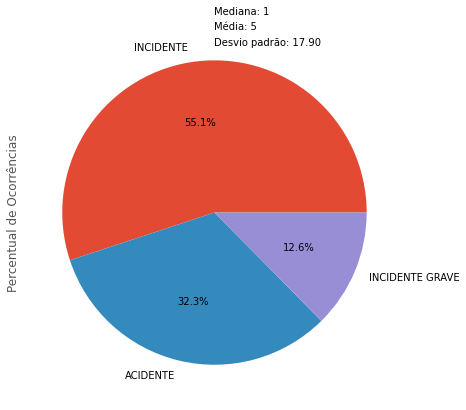

In [12]:
# SELECIONANDO STYLE DO GRÁFICO
plt.style.use("ggplot")

# CONFIGURANDO LAYOUT E INFORMAÇÕES DO GRÁFICO
ocorrencias['tipo'].value_counts().plot(kind = "pie", autopct = "%1.1f%%", label = "Percentual de Ocorrências", figsize = (7, 7))

# CALCULANDO A MEDIANA
plt.text(0, 1.3, 'Mediana: %d' % (np.median(np.array(contador))))

# CALCULANDO A MÉDIA
plt.text(0, 1.2, 'Média: %d' % (np.mean(np.array(contador))))

# CALCULANDO DO DESVIO PADRÃO
plt.text(0, 1.1, 'Desvio padrão: %.2f' % (static.stdev(contador)))   

# MOSTRANDO O GRÁFICO
plt.show()

REGRESSÃO LINEAR


In [13]:
# CRIAÇÃO DO DATAFRAME
dataframe = pd.DataFrame()

# SEPARANDO O EIXO 'X' E 'Y' NO GRÁFICO
dataframe['x'] = ocorrencias['aeronave_ano_fabricacao']
dataframe['y'] = ocorrencias['aeronave_assentos']

# ATRIBUINDO EIXO 'X' E 'Y' EM VARIÁVEIS
x_values = dataframe[['x']]
y_values = dataframe[['y']]

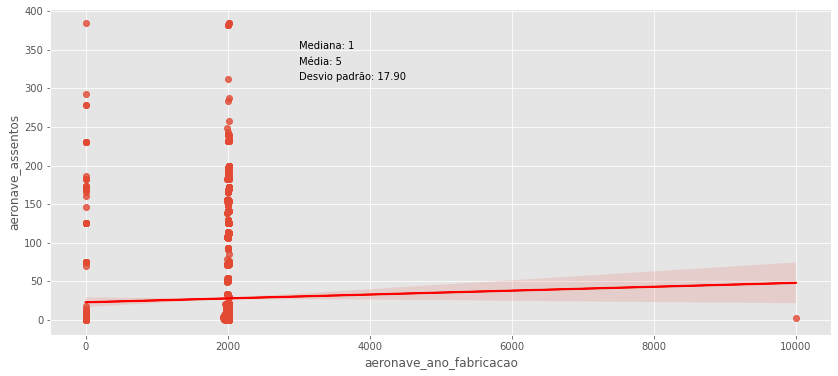

In [14]:
# PLOTANDO GRÁFICO DE REGRESSÃO
plt.figure(figsize=(14,6))

# CONFIGURANDO LAYOUT DO GRÁFICO
sns.regplot(x='aeronave_ano_fabricacao', y='aeronave_assentos', data=ocorrencias)

# TRAÇANDO A LINHA DE REGRESSÃO
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

# PLOTANDO UM GRÁFICO EM CIMA DO OUTRO
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')

# CALCULANDO A MEDIANA
plt.text(3000, 350.9, 'Mediana: %d' % (np.median(np.array(contador))))

# CALCULANDO A MÉDIA
plt.text(3000, 330.9, 'Média: %d' % (np.mean(np.array(contador))))

# CALCULANDO DO DESVIO PADRÃO
plt.text(3000, 310.9, 'Desvio padrão: %.2f' % (static.stdev(contador)))   

# MOSTRANDO O GRÁFICO
plt.show()